In [66]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
tf.config

<module 'tensorflow._api.v2.config' from '/home/metal/Desktop/mlsda/.venv/lib/python3.13/site-packages/tensorflow/_api/v2/config/__init__.py'>

In [67]:
IMAGE_SIZE = (150,150)
BATCH_SIZE = 32
DATA_DIR = 'Dataset'

In [68]:
train_data =  ImageDataGenerator(1./255)
val_data = ImageDataGenerator(1./255)
test_data = ImageDataGenerator(1./255)


In [69]:
train_gen = train_data.flow_from_directory(
    directory =  f'./{DATA_DIR}/train',
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode =  'binary'
)  

val_gen = val_data.flow_from_directory(
    directory =  f'./{DATA_DIR}/val',
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode =  'binary'
)  

test_gen = test_data.flow_from_directory(
    directory =  f'./{DATA_DIR}/test',
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode =  'binary',
    shuffle = False,
)  

Found 17498 images belonging to 2 classes.
Found 3748 images belonging to 2 classes.
Found 3752 images belonging to 2 classes.


In [70]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150,150,3)),
    tf.keras.layers.Conv2D(32, 3,activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(138,3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [71]:
model.compile(
    loss =  'binary_crossentropy',
    optimizer = 'Adam',
    metrics =  ['Accuracy'],
)



In [72]:
model.fit(
    train_gen,
    validation_data = val_gen,
    epochs = 20,
)

Epoch 1/20


/home/metal/Desktop/mlsda/.venv/lib/python3.13/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/home/metal/Desktop/mlsda/.venv/lib/python3.13/site-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - Accuracy: 0.5230 - loss: 41.3890

/home/metal/Desktop/mlsda/.venv/lib/python3.13/site-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


547/547 ━━━━━━━━━━━━━━━━━━━━ 99s 179ms/step - Accuracy: 0.5326 - loss: 7.9197 - val_Accuracy: 0.5299 - val_loss: 0.6871
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 99s 182ms/step - Accuracy: 0.5559 - loss: 0.6764 - val_Accuracy: 0.5213 - val_loss: 0.7263
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 100s 183ms/step - Accuracy: 0.5782 - loss: 0.6616 - val_Accuracy: 0.5336 - val_loss: 0.7071
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 101s 184ms/step - Accuracy: 0.6169 - loss: 0.6283 - val_Accuracy: 0.5536 - val_loss: 0.7390
Epoch 5/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 100s 182ms/step - Accuracy: 0.6678 - loss: 0.5850 - val_Accuracy: 0.5920 - val_loss: 0.7784
Epoch 6/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 99s 182ms/step - Accuracy: 0.7223 - loss: 0.5221 - val_Accuracy: 0.6110 - val_loss: 0.7802
Epoch 7/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 101s 185ms/step - Accuracy: 0.7837 - loss: 0.4400 - val_Accuracy: 0.6102 - val_loss: 0.9148
Epoch 8/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 100s 183ms/step - Accuracy: 0.8527 - loss: 0.3266 

In [73]:
loss, accuracy = model.evaluate(test_gen)
accuracy

  1/118 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - Accuracy: 0.5938 - loss: 4.4351

/home/metal/Desktop/mlsda/.venv/lib/python3.13/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/home/metal/Desktop/mlsda/.venv/lib/python3.13/site-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - Accuracy: 0.6469 - loss: 3.3893


0.6468549966812134

In [74]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [75]:
img_path  = 'cat2.jpeg'

img = image.load_img(img_path,target_size=IMAGE_SIZE)
img_array = image.img_to_array(img)/225.0
img_expand = np.expand_dims(img_array, axis=0)

In [76]:
prediction = model.predict(img_expand)
label = 'Dog' if (prediction[0] > 0.5) else 'Cat'
print(prediction[0])
print(label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[1.4047965e-17]
Cat


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1333333].


Cat


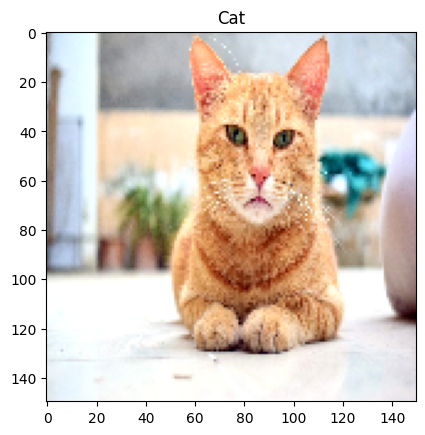

In [77]:
plt.imshow(img_array)
plt.title(label)
print(label)

In [78]:
model.save("cat_dog.h5")